# Оптимизация многомерной функции с ограничениями

In [1]:
import numpy as np
import scipy.optimize as sopt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# точки в вершинах треугольной области допустимых значений параметров
H = 100.
pts = np.array([[2., 1.],
                [H-2.,1.],
                [H/2.,H/2.-1.]])

In [3]:
def closeBorder(nodes):
    return np.vstack((nodes, nodes[0]))

brd = closeBorder(pts)

In [4]:
# целевая функция

def G(L, R, H, lst=[]):
    lst.append([L,R])
    return H*(L-R**2)**2+(1.-L)**2

In [5]:
# расчет целевой функции на прямоугольной равномерной решетке

x = np.linspace(pts[:,0].min(), pts[:,0].max(), 100)
y = np.linspace(pts[:,1].min(), pts[:,1].max(), 100)
X, Y = np.meshgrid(x, y)
Z = G(X, Y, H)

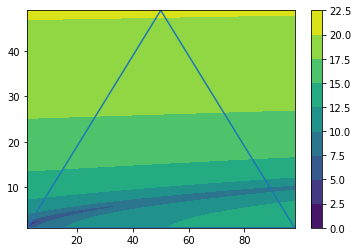

In [6]:
# контурная карта целевой функции
#plt.figure(figsize=(10,10))
plt.contourf(X, Y, np.log(Z+1))
plt.plot(brd[:,0], brd[:,1])
#plt.xticks(range(5))
#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.colorbar()

In [7]:
# [1., 1-H, 1]
# [np.inf, np.inf, np.inf]
# [[1., -1], [-1, -1], [0, 1]]

In [8]:
lc = sopt.LinearConstraint([[1., -1], [-1, -1], [0, 1]], 
                           [1., 1-H, 1], 
                           [np.inf, np.inf, np.inf])

In [9]:
# 1     <=  1*L -1*R <= np.inf
# 1 - H <= -1*L -1*R <= np.inf
# 1     <=  0*L +1*R <= np.inf 

### Оптимизация функции G с ограничениями в виде неравенств методом COBYLA

In [10]:
ineq_constr = {'type':'ineq',
               # ограничения в виде неравенств (правая часть неравенств c(x)>=0)
               'fun':lambda x : np.array([-1.+x[0]-x[1],
                                          H-1.-x[0]-x[1],
                                          -1.+x[1]]),
               # якобиан 'fun'
               'jac':lambda x : np.array([[ 1., -1.],
                                          [-1., -1.],
                                          [ 0.,  1.]])
              }

In [11]:
lst = []
ret = sopt.minimize(lambda x, H, lst: G(x[0], x[1], H, lst), [80., 10], args=(H, lst), 
              method='COBYLA',
              options={'tol': 1e-12, 'disp': True, 'maxiter':100000},
              constraints=[ineq_constr])
ret

     fun: 2.6127932196568615
   maxcv: -0.0
 message: 'Optimization terminated successfully.'
    nfev: 43427
  status: 1
 success: True
       x: array([2.61479031, 1.61479031])

In [12]:
arr = np.array(lst)
arr.shape

(43427, 2)

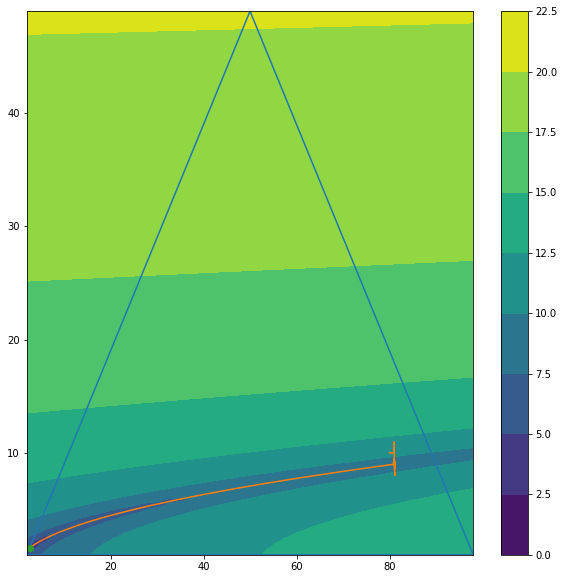

In [13]:
plt.figure(figsize=(10,10))
plt.contourf(X, Y, np.log(Z+1))
plt.plot(brd[:,0], brd[:,1])
plt.plot(arr[:,0], arr[:,1])
plt.plot(ret.x[0], ret.x[1], 'o')
#plt.xticks(range(5))
#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.colorbar()

### Оптимизация модифицированной функции G без ограничений методом Нелдера-Мида (деформируемого многогранника)

In [14]:
def G(L, R, H, lst=[]):
    lst.append([L,R])
    if (-1.+L-R >= 0) and (H-1.-L-R>=0) and (-1.+R>=0):
        return H*(L-R**2)**2+(1.-L)**2
    else:
        return 1e15

In [15]:
lst = []
ret = sopt.minimize(lambda x, H, lst: G(x[0], x[1], H, lst), [80., 10], args=(H, lst),
                    method='Nelder-Mead', 
                    options={'xatol': 1e-9, 'disp': True, 'maxiter':100000})
arr = np.array(lst)

Optimization terminated successfully.
         Current function value: 2.612793
         Iterations: 183
         Function evaluations: 344


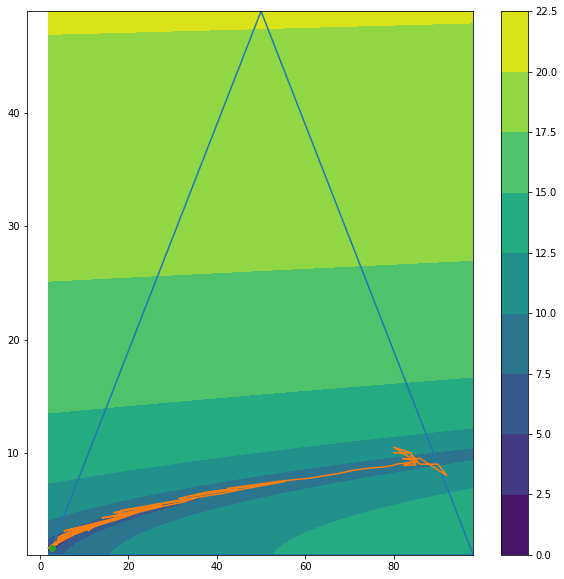

In [16]:
plt.figure(figsize=(10,10))
plt.contourf(X, Y, np.log(Z+1))
plt.plot(brd[:,0], brd[:,1])
plt.plot(arr[:,0], arr[:,1])
plt.plot(ret.x[0], ret.x[1], 'o')
#plt.xticks(range(5))
#plt.xlim(0, 5)
#plt.ylim(0, 5)
#plt.axis('equal')
plt.colorbar()

In [17]:
ret

 final_simplex: (array([[2.61479031, 1.61479031],
       [2.61479031, 1.61479031],
       [2.61479031, 1.61479031]]), array([2.61279322, 2.61279322, 2.61279322]))
           fun: 2.6127932196568615
       message: 'Optimization terminated successfully.'
          nfev: 344
           nit: 183
        status: 0
       success: True
             x: array([2.61479031, 1.61479031])